# Atividade prática: algoritmo K-Nearest Neighbors (KNN)

-  Problema: classificar de forma precisa a qualidade do vinho de uma nova instância?


https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors

In [233]:
TrainingData_2F_Norm = pd.read_csv('/home/kaline/workspace/mestrado/ML/Dados_Normalizados_2Features/TrainingData_2F_Norm.txt')
TrainingData_2F_Norm

,ID,total.sulfur.dioxide,citric.acid,Class
0,T1,0.638,0.559,0
1,T2,0.795,0.441,0
2,T3,0.409,0.603,0
3,T4,0.539,0.000,0
4,T5,0.236,0.515,0
5,T6,0.071,0.559,0
6,T7,0.102,0.882,0
7,T8,0.071,0.882,0
8,T9,0.173,0.382,0
9,T10,0.488,0.956,0


In [234]:
TestingData_2F_Norm = pd.read_csv('/home/kaline/workspace/mestrado/ML/Dados_Normalizados_2Features/TestingData_2F_Norm.txt')
TestingData_2F_Norm

,ID,total.sulfur.dioxide,citric.acid,Class
0,N1,0.134,0.000,0
1,N2,0.496,0.441,0
2,N3,0.031,0.735,1
3,N4,0.181,1.000,1


In [235]:
TrainingData_11F_Norm = pd.read_csv('Dados_Normalizados_11Features/TrainingData_11F_Norm.txt')
TrainingData_11F_Norm

,ID,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,Class
T1,0.449,0.278,0.559,0.015,0.985,\t0.489,0.638,0.769,0.293,0.150,0.000,0.0,NaN
T2,0.168,0.685,0.441,0.455,0.220,\t0.34,0.795,0.769,0.493,0.490,0.266,0.0,NaN
T3,0.439,0.222,0.603,0.121,0.333,\t0.149,0.409,0.673,0.373,0.052,0.156,0.0,NaN
T4,0.131,0.741,0.000,0.424,0.409,\t1,0.539,0.406,0.360,0.020,0.156,0.0,NaN
T5,0.168,0.352,0.515,0.015,0.371,\t0.255,0.236,0.459,0.547,0.085,0.109,0.0,NaN
T6,0.318,0.537,0.559,0.000,0.432,\t0.021,0.071,0.516,0.360,0.065,0.141,0.0,NaN
T7,0.28,0.093,0.882,0.227,0.492,\t0.128,0.102,0.682,0.613,0.170,0.328,0.0,NaN
T8,0.505,0.241,0.882,0.106,0.856,\t0.064,0.071,0.714,0.147,0.418,0.141,0.0,NaN
T9,0.234,0.481,0.382,0.061,0.174,\t0.106,0.173,0.510,0.613,0.144,0.172,0.0,NaN
T10,1,0.241,0.956,0.909,0.432,\t0.383,0.488,0.612,0.067,0.275,1.000,0.0,NaN


In [236]:
TestingData_11F_Norm = pd.read_csv('Dados_Normalizados_11Features/TestingData_11F_Norm.txt')
TestingData_11F_Norm

,ID,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,Class
0,N1,0.075,0.500,0.000,-0.015,0.136,0.234,0.134,0.294,0.573,0.020,0.156,0
1,N2,0.187,0.333,0.441,0.091,0.333,0.660,0.496,0.551,0.680,0.065,0.141,0
2,N3,0.458,0.278,0.735,0.136,0.492,0.043,0.031,0.493,0.387,0.150,0.484,1
3,N4,0.243,0.463,1.000,0.030,2.848,0.213,0.181,0.506,0.213,0.418,0.094,1


In [237]:
TrainingData_2F_Original = pd.read_csv('Dados_Originais_2Features/TrainingData_2F_Original.txt')
TrainingData_2F_Original

,ID,total.sulfur.dioxide,citric.acid,class
0,T1,90.0,0.38,0
1,T2,110.0,0.30,0
2,T3,61.0,0.41,0
3,T4,77.5,0.00,0
4,T5,39.0,0.35,0
5,T6,18.0,0.38,0
6,T7,22.0,0.60,0
7,T8,18.0,0.60,0
8,T9,31.0,0.26,0
9,T10,71.0,0.65,0


In [238]:
TestingData_2F_Original = pd.read_csv('Dados_Originais_2Features/TestingData_2F_Original.txt')
TestingData_2F_Original

,ID,total.sulfur.dioxide,citric.acid,class
0,N1,26,0.00,0
1,N2,72,0.30,0
2,N3,13,0.50,1
3,N4,32,0.68,1


In [239]:
if 'ID' in TrainingData_2F_Norm:
    TrainingData_2F_Norm = TrainingData_2F_Norm.drop(columns=['ID'])
    TrainingData_2F_Norm
TrainingData_2F_Norm

,total.sulfur.dioxide,citric.acid,Class
0,0.638,0.559,0
1,0.795,0.441,0
2,0.409,0.603,0
3,0.539,0.000,0
4,0.236,0.515,0
5,0.071,0.559,0
6,0.102,0.882,0
7,0.071,0.882,0
8,0.173,0.382,0
9,0.488,0.956,0


In [240]:
TrainingData_2F_Norm = TrainingData_2F_Norm.rename(columns={'Class':'Wine quality'})
TrainingData_2F_Norm

,total.sulfur.dioxide,citric.acid,Wine quality
0,0.638,0.559,0
1,0.795,0.441,0
2,0.409,0.603,0
3,0.539,0.000,0
4,0.236,0.515,0
5,0.071,0.559,0
6,0.102,0.882,0
7,0.071,0.882,0
8,0.173,0.382,0
9,0.488,0.956,0


In [241]:
TrainingData_2F_Norm.tail()

,total.sulfur.dioxide,citric.acid,Wine quality
39,0.094,0.103,1
40,0.055,0.662,1
41,0.409,0.088,1
42,1.000,0.412,1
43,0.244,0.721,1


In [242]:
TrainingData_2F_Norm.describe()

,total.sulfur.dioxide,citric.acid,Wine quality
count,44.000000,44.000000,44.000000
mean,0.293000,0.451318,0.500000
std,0.230715,0.286101,0.505781
min,0.000000,0.000000,0.000000
25%,0.120000,0.217250,0.000000
50%,0.244000,0.471000,0.500000
75%,0.413000,0.694750,1.000000
max,1.000000,1.000000,1.000000


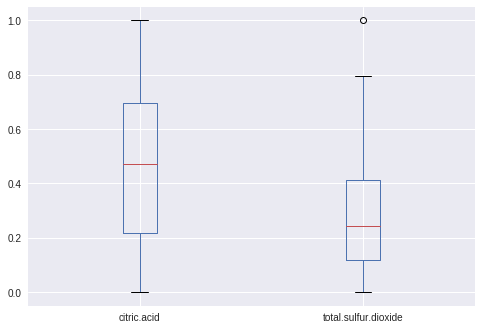

In [243]:
TrainingData_2F_Norm.boxplot(column=['citric.acid', 'total.sulfur.dioxide'])


### TrainingData_2F_Original

In [244]:
TrainingData_2F_Original.head()

,ID,total.sulfur.dioxide,citric.acid,class
0,T1,90.0,0.38,0
1,T2,110.0,0.30,0
2,T3,61.0,0.41,0
3,T4,77.5,0.00,0
4,T5,39.0,0.35,0


In [245]:
if 'ID' in TrainingData_2F_Original:
    TrainingData_2F_Original = TrainingData_2F_Original.drop(columns=['ID'])
    TrainingData_2F_Original
TrainingData_2F_Original.head()

,total.sulfur.dioxide,citric.acid,class
0,90.0,0.38,0
1,110.0,0.30,0
2,61.0,0.41,0
3,77.5,0.00,0
4,39.0,0.35,0


In [246]:
TrainingData_2F_Original = TrainingData_2F_Original.rename(columns={'class':'Wine quality'})
TrainingData_2F_Original.head()

,total.sulfur.dioxide,citric.acid,Wine quality
0,90.0,0.38,0
1,110.0,0.30,0
2,61.0,0.41,0
3,77.5,0.00,0
4,39.0,0.35,0


In [247]:
TrainingData_2F_Original.describe()

,total.sulfur.dioxide,citric.acid,Wine quality
count,44.000000,44.000000,44.000000
mean,46.215909,0.306818,0.500000
std,29.303623,0.194527,0.505781
min,9.000000,0.000000,0.000000
25%,24.250000,0.147500,0.000000
50%,40.000000,0.320000,0.500000
75%,61.500000,0.472500,1.000000
max,136.000000,0.680000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3338d89890>,
      dtype=object)

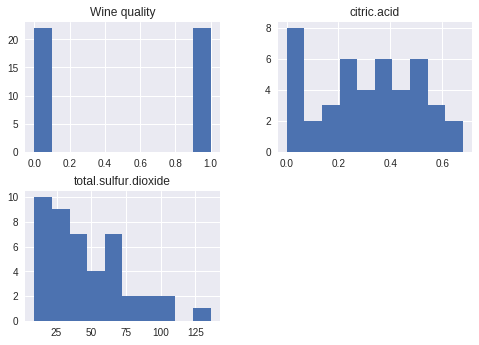

In [248]:
TrainingData_2F_Original.hist()

### Train test split

In [249]:
x = TrainingData_2F_Original.drop(columns=['Wine quality'])
x.head()

,total.sulfur.dioxide,citric.acid
0,90.0,0.38
1,110.0,0.30
2,61.0,0.41
3,77.5,0.00
4,39.0,0.35


In [250]:
y = TrainingData_2F_Original['Wine quality'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [251]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [252]:
clf = neighbors.KNeighborsClassifier(n_neighbors=7)

In [253]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [254]:
clf.predict(X_test)[0:5]

array([0, 1, 0, 0, 0])

In [255]:
clf.score(X_test, Y_test)

0.4444444444444444

### K-fold

In [256]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.44444444 0.44444444 0.55555556 0.44444444 0.25      ]
cv_scores mean:0.42777777777777776
